In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import AvantgardeModelUtils

reload(AvantgardeModelUtils)
from AvantgardeModelUtils import *
import metrics

reload(metrics)
from metrics import *

#TODO: adjust paths for your environment
datadir = "/home/quante/mnt/cluster/p/projects/compacts/projects/DeMo/social_agent_based_modelling/data"
figuredir = "/home/quante/PIK_Cloud/papers/genericSocialDynamics/figures"

file_high_gamma = os.path.join(datadir,
                               "evolution/agent_data_evolution_beta-avantgarde_mode-0.80_concentration-5.0.csv")
file_mid_gamma = os.path.join(datadir, "evolution/agent_data_evolution_beta-avantgarde_mode-0.50_concentration-5.0.csv")
file_low_gamma = os.path.join(datadir, "evolution/agent_data_evolution_beta-avantgarde_mode-0.20_concentration-5.0.csv")
file_uniform = os.path.join(datadir, "distributions/agent_data_1000steps.csv")

#plotting parameters
fontsize = 12
cm = 1 / 2.54

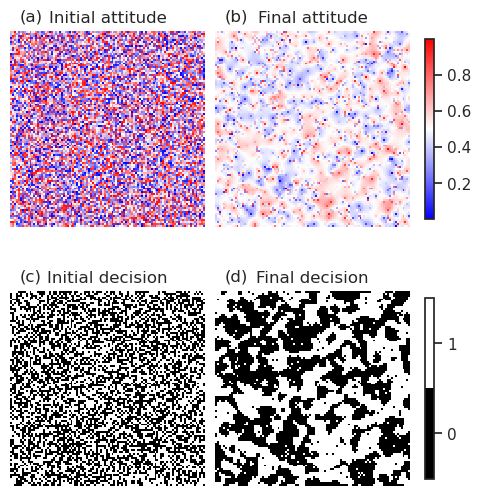

In [4]:
data_uniform = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])
sample_uniform = data_uniform.query("seed == 100")

cmap_black_white = LinearSegmentedColormap.from_list('Custom', ((0, 0, 0), (1, 1, 1)), 2)
sns.set(style="white", color_codes=True)

fig, axs = plt.subplots(2, 2, figsize=(16 * cm, 16 * cm), sharex=True, sharey=True)

startStep = 0
endStep = 1000
im1 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=axs[0, 0],
                  square=True,
                  cbar=False,
                  cmap="bwr")
axs[0, 0].set_title('Initial attitude', size=fontsize);
axs[0, 0].text(0.05, 1.05, "(a)", transform=axs[0, 0].transAxes, size=fontsize)

im2 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=axs[0, 1],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap="bwr")
axs[0, 1].set_title('Final attitude', size=fontsize);
axs[0, 1].text(0.05, 1.05, "(b)", transform=axs[0, 1].transAxes, size=fontsize)

im3 = sns.heatmap(Grid(Choice(sample_uniform, startStep)),
                  ax=axs[1, 0],
                  square=True,
                  yticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
axs[1, 0].set_title('Initial decision', size=fontsize);
axs[1, 0].text(0.05, 1.05, "(c)", transform=axs[1, 0].transAxes, size=fontsize)

im4 = sns.heatmap(Grid(Choice(sample_uniform, endStep)),
                  ax=axs[1, 1],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap=cmap_black_white)
axs[1, 1].set_title('Final decision', size=fontsize);
axs[1, 1].text(0.05, 1.05, "(d)", transform=axs[1, 1].transAxes, size=fontsize)

fig.subplots_adjust(wspace=0.05, hspace=0.15)

mappable = im1.get_children()[0]
fig.colorbar(mappable, ax=axs[0, :], shrink=.8, orientation='vertical', pad=0.03)

mappable_decision = im3.get_children()[0]
colorbar = fig.colorbar(mappable_decision, ax=axs[1, :], shrink=.8, orientation='vertical', pad=0.03)
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['0', '1'])

plt.savefig(os.path.join(figuredir, "example_initial_final.pdf"), dpi=300)


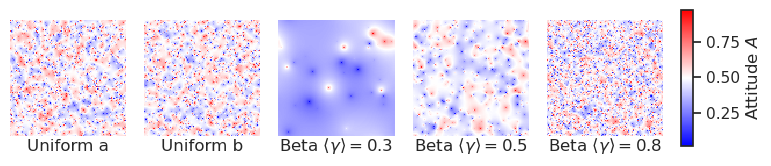

In [5]:
# plot results for different states
####################################

columns = ["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"]
data_uniform = LoadSimulation(file_uniform, columns=columns).query("step == 1_000")
data_mid_gamma = LoadSimulation(file_mid_gamma, columns=columns).query("step == 400")
data_low_gamma = LoadSimulation(file_low_gamma, columns=columns).query("step == 400")
data_high_gamma = LoadSimulation(file_high_gamma, columns=columns).query("step == 400")

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(20 * cm, 5 * cm))
gs = GridSpec(nrows=1, ncols=6, width_ratios=[1, 1, 1, 1, 1, 0.1])

ax = [fig.add_subplot(gs[0, i]) for i in range(5)]


colors = ((0, 0, 0), (1, 1, 1))
cmap_black_white = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

im1 = sns.heatmap(Grid(data_uniform.query("seed==103").get("affinity").values),
                  ax=ax[0],
                  yticklabels=False,
                  xticklabels=False,
                  square=True,
                  cbar=False,
                  cmap="bwr")

im1 = sns.heatmap(Grid(data_uniform.query("seed==102").get("affinity").values),
                  ax=ax[1],
                  yticklabels=False,
                  xticklabels=False,
                  square=True,
                  cbar=False,
                  cmap="bwr")

im2 = sns.heatmap(Grid(data_low_gamma.query("seed==100").get("affinity").values),
                  ax=ax[2],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")

im3 = sns.heatmap(Grid(data_mid_gamma.query("seed==100").get("affinity").values),
                  ax=ax[3],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")

im4 = sns.heatmap(Grid(data_high_gamma.query("seed==100").get("affinity").values),
                  ax=ax[4],
                  square=True,
                  yticklabels=False,
                  xticklabels=False,
                  cbar=False,
                  cmap="bwr")

fig.subplots_adjust(wspace=0.05, hspace=0.1, left=0.0, right=1.)

mappable = im1.get_children()[0]
fig.colorbar(mappable, cax=fig.add_subplot(gs[0, 5]), shrink=.9, orientation='vertical', label="Attitude $A$")

ax[0].set_title("Uniform a", y=-0.2)
ax[1].set_title("Uniform b", y=-0.2)
ax[2].set_title(r"Beta $\langle \gamma \rangle = 0.3$", y=-0.2)
ax[3].set_title(r"Beta $\langle \gamma \rangle = 0.5$", y=-0.2)
ax[4].set_title(r"Beta $\langle \gamma \rangle = 0.8$", y=-0.2)

plt.tight_layout()
plt.savefig(os.path.join(figuredir, "results_changing_distributions.pdf"), dpi=300)

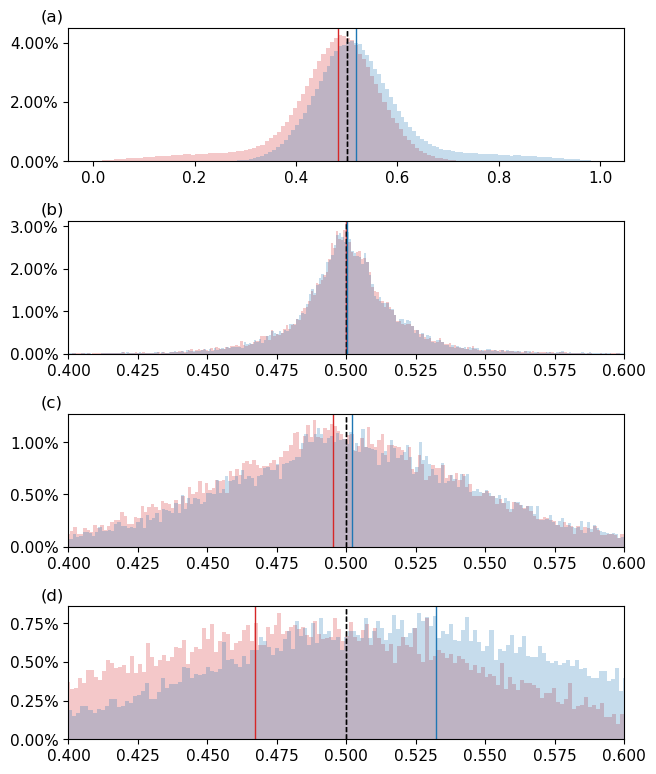

In [45]:
from matplotlib.ticker import PercentFormatter

cmap = plt.get_cmap('Set2')
gammacolors = [cmap(i) for i in range(6)]
data_uniform = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])
data_uniform_final = data_uniform.query("step == 1000")

columns = ["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"]
data_low_gamma = LoadSimulation(file_low_gamma, columns=columns).query("step == 400")
data_mid_gamma = LoadSimulation(file_mid_gamma, columns=columns).query("step == 400")
data_high_gamma = LoadSimulation(file_high_gamma, columns=columns).query("step == 400")


def histogram(sample, ax, color, label=None, alpha=0.25, bins=100):
    samplesize = len(sample)
    histogram = ax.hist(sample, bins=bins, alpha=alpha, color=color, weights=np.ones_like(sample) * (1 / samplesize),
                        label=label)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.axvline(0.5, ls="dashed", color="black")
    ax.axvline(np.median(sample), color=color)
    return histogram


fig, axs = plt.subplots(4, 1, figsize=(17 * cm, 20 * cm))
histogram(data_uniform_final.query("affinityGoal < 0.5").get("affinity").values, axs[0], "tab:red")
histogram(data_uniform_final.query("affinityGoal >= 0.5").get("affinity").values, axs[0], "tab:blue")
axs[0].text(-0.05, 1.05, "(a)", transform=axs[0].transAxes, size=fontsize)

histogram(data_low_gamma.query("affinityGoal < 0.5").get("affinity").values, axs[1],
          "tab:red", label="low $\gamma$ con", alpha=0.25, bins=500)
histogram(data_low_gamma.query("affinityGoal >= 0.5").get("affinity").values, axs[1],
          "tab:blue", label="low $\gamma$ pro", alpha=0.25, bins=500)
axs[1].text(-0.05, 1.05, "(b)", transform=axs[1].transAxes, size=fontsize)
axs[1].set_xlim(0.4, 0.6)

histogram(data_mid_gamma.query("affinityGoal < 0.5").get("affinity").values, axs[2],
          "tab:red", label="medium $\gamma$ con", alpha=0.25, bins=500)
histogram(data_mid_gamma.query("affinityGoal >= 0.5").get("affinity").values, axs[2],
          "tab:blue", label="medium $\gamma$ pro", alpha=.25, bins=500)
axs[2].text(-0.05, 1.05, "(c)", transform=axs[2].transAxes, size=fontsize)
axs[2].set_xlim(0.4, 0.6)

histogram(data_high_gamma.query("affinityGoal < 0.5").get("affinity").values, axs[3],
          "tab:red", label="high $\gamma$ pro", alpha=.25, bins=500)
histogram(data_high_gamma.query("affinityGoal >= 0.5").get("affinity").values, axs[3],
          "tab:blue", label="high $\gamma$ con", alpha=0.25, bins=500)

axs[3].set_xlim(0.4, 0.6)
axs[3].text(-0.05, 1.05, "(d)", transform=axs[3].transAxes, size=fontsize)

plt.tight_layout()
plt.savefig(os.path.join(figuredir, "inherent_decision_distribution.pdf"), dpi=300)

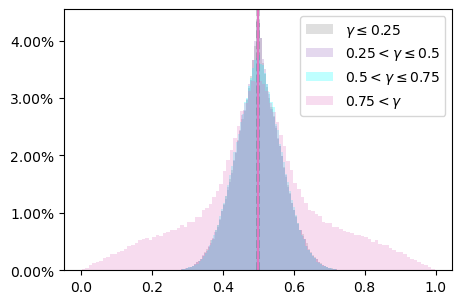

In [41]:
merged_data = pd.concat([data_low_gamma, data_mid_gamma, data_high_gamma, data_uniform_final])
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 8 * cm))
histogram(merged_data.query("avantgarde <= 0.25").get("affinity").values, axs,
          "grey", label="$\gamma \leq 0.25$")
histogram(merged_data.query("avantgarde > 0.25").query("avantgarde <= 0.5").get("affinity").values, axs,
          "tab:purple", label="$0.25 < \gamma \leq 0.5 $")
histogram(merged_data.query("avantgarde > 0.5").query("avantgarde <= 0.75").get("affinity").values, axs,
          "cyan", label="$0.5 < \gamma \leq 0.75 $")
histogram(merged_data.query("avantgarde > 0.75").get("affinity").values, axs,
          "tab:pink", label="$0.75<\gamma$")
axs.legend()
plt.tight_layout()
plt.savefig(os.path.join(figuredir, "spread_by_avantgarde_bins.pdf"), dpi=300)

In [3]:
#load data, for index mapping griddimension is N for an NxN grid, defaults to 100
def process_file(file, griddimension=100):
    mapping = create_index_mapping(griddimension)
    print(f"Working on: {file}")
    data = LoadSimulation(file, columns=["seed", "id", "avantgarde", "affinity", "affinityGoal", "step"])
    eq_data = data.query("step == 100")
    mean = eq_data.get("avantgarde").mean()
    metrics = {}
    # get metrics
    for s, sample in eq_data.groupby("seed"):
        friends_result = np.array(friends_count(sample, mapping)) / 8
        decision_result = decision_alignment(sample).astype(float)
        satisfaction_result = satisfaction(sample, mapping)

        metrics["friends_mean"] = np.mean(friends_result)
        metrics["decision_mean"] = np.mean(decision_result)
        metrics["satisfaction_mean"] = np.mean(satisfaction_result)

        percentiles = [5, 25, 50, 75, 95]
        for i_percentile in percentiles:
            metrics["friends_q" + str(i_percentile)] = np.percentile(friends_result, i_percentile)
            metrics["decision_q" + str(i_percentile)] = np.percentile(decision_result, i_percentile)
            metrics["satisfaction_q" + str(i_percentile)] = np.percentile(satisfaction_result, i_percentile)
    return mean, metrics


def collect_y_data(num, lists_avantgarde_means, key):
    y_data = []
    index = 0
    for avantgarde_mean in lists_avantgarde_means[num]:
        y_data = y_data + [results_by_distr_mean_avantgarde[num, avantgarde_mean, index][key]]
        index += 1
    return y_data

In [ ]:
lists_avantgarde_means = {}
results_by_distr_mean_avantgarde = {}

location = os.path.join(datadir, "data/paramstest")

fkey = "avantgarde"
nums = ["5.0", "10.0", "constant"]

for num in nums:
    files = []
    lists_avantgarde_means[num] = []
    for fname in os.listdir(location):
        if f"{num}" in fname and f"-{fkey}" in fname \
                and "_mode" in fname:
            files.append(os.path.join(location, fname))

    index = 0
    for file in files:
        avantgarde_mean, metrics_dict = process_file(file)
        results_by_distr_mean_avantgarde[num, avantgarde_mean, index] = metrics_dict
        lists_avantgarde_means[num].append(avantgarde_mean)
        index += 1

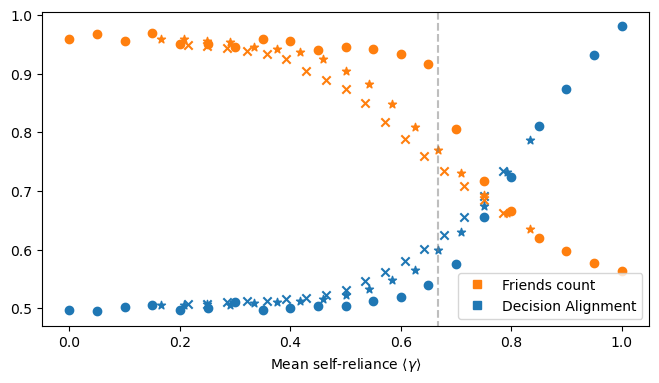

In [9]:

fig, (ax) = plt.subplots(1, 1, figsize=(17 * cm, 10 * cm))

markerdict = {"constant": "o", "10.0": "*", "5.0": "d"}

for num in nums:
    ax.scatter(lists_avantgarde_means[num], collect_y_data(num, lists_avantgarde_means, "decision_mean"),
               marker=markerdict[num], color="tab:blue", s=4)

    ax.scatter(lists_avantgarde_means[num], collect_y_data(num, lists_avantgarde_means, "friends_mean"),
               marker=markerdict[num], color="tab:orange", s=4)

ax.set_xlabel(r"Mean self-reliance $\langle \gamma \rangle$")

from matplotlib.lines import Line2D

# Create custom legend handles and labels
legend_handles = [
    Line2D([0], [0], marker='s', color='tab:orange', linestyle="", markersize=6, label='Friends count'),
    Line2D([0], [0], marker='s', color='tab:blue', linestyle="", markersize=6, label='Decision Alignment'),
    Line2D([0], [0], color='tab:gray', linestyle=':', marker="d", linewidth=1, label=r'$c_{\gamma} = 7.0$'),
    Line2D([0], [0], color='tab:gray', linestyle='--', marker='*', linewidth=1, label=r'$c_{\gamma} = 12.0$'),
    Line2D([0], [0], color='tab:gray', linestyle='-', marker='o', linewidth=1, label=r'$c_{\gamma} \rightarrow \infty$')
]

# Add the legend to the plot
ax.legend(handles=legend_handles, loc='best')

ax.set_ylim(ax.get_ylim())
ax.plot([2 / 3, 2 / 3], [0, 1.1], color="tab:gray", linestyle="--", alpha=0.5)

#ax.set_title(r"Decision alignment vs. Friends")
plt.tight_layout()
plt.savefig(os.path.join(figuredir, "alignment_friends.pdf"), dpi=300)